# Nguyễn Tiến Nam
# Dataset: Car_Sales_Report

# Import các thư viện

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# Đọc file

In [ ]:
df = pd.read_csv('/Car Sales.csv', skipinitialspace=True, sep=',', header=0, encoding='utf-8')
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


# Check thông tin file

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [ ]:
df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [ ]:
df.nunique()

,0
Car_id,23906
Date,612
Customer Name,3021
Gender,2
Annual Income,2508
Dealer_Name,28
Company,30
Model,154
Engine,2
Transmission,2


# Làm sạch dữ liệu, xử lý dữ liệu bị mất và chuyển type dữ liệu

Ta thấy rằng cột df['Date'] đang là object, ta chuyển cột này về dạng datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

Extract thêm các cột month, day, year từ cột df['Date']



In [ ]:
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Year'] = df.Date.dt.year

In [ ]:
# drop cột Date
df.drop('Date', axis=1, inplace=True)
# In lại df
df

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Month,Day,Year
0,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,1,2,2022
1,C_CND_000002,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,1,2,2022
2,C_CND_000003,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,1,2,2022
3,C_CND_000004,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,1,2,2022
4,C_CND_000005,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,1,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco,12,31,2023
23902,C_CND_023903,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown,12,31,2023
23903,C_CND_023904,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale,12,31,2023
23904,C_CND_023905,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin,12,31,2023


In [ ]:
df.dtypes

,0
Car_id,object
Customer Name,object
Gender,object
Annual Income,int64
Dealer_Name,object
Company,object
Model,object
Engine,object
Transmission,object
Color,object


Cột Dealer_No đang là type object, ta chuyển nó về dạng int

In [ ]:
df['Dealer_No '] = df['Dealer_No '].astype(str).str.replace('-','').astype(int)

In [ ]:
df.dtypes

,0
Car_id,object
Customer Name,object
Gender,object
Annual Income,int64
Dealer_Name,object
Company,object
Model,object
Engine,object
Transmission,object
Color,object


Loại bỏ khoảng trắng ở tên các cột

In [ ]:
df.columns

Index(['Car_id', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name',
       'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)',
       'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region', 'Month', 'Day',
       'Year'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()
df.columns

Index(['Car_id', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name',
       'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)',
       'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region', 'Month', 'Day',
       'Year'],
      dtype='object')

Ta thấy rằng cột Customer_Name có một giá trị bị thiếu, nhưng vì đây là dataset bán xe và chiếc xe đã được bán, tạm thời ta sẽ fill giá trị bị thiếu đó bằng 'Unknown'

In [ ]:
df['Customer Name'].fillna('Unknown', inplace=True)
df.isnull().sum()

,0
Car_id,0
Customer Name,0
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0
Color,0


# Visualize dữ liệu bằng một số dashboard

## Giờ ta hãy đặt một vài câu hỏi

Mức giá trung bình bán ra một chiếc xe của mỗi đại lý là bao nhiêu ?

In [ ]:
average_selling_price = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
average_selling_price

,Dealer_Name,Price ($)
0,Buddy Storbeck's Diesel Service Inc,27217.261563
1,C & M Motors Inc,28111.755200
2,Capitol KIA,28189.703822
3,Chrysler Plymouth,27555.526400
4,Chrysler of Tri-Cities,28123.091054
5,Classic Chevy,28602.014446
6,Clay Johnson Auto Sales,27816.027113
7,Diehl Motor CO Inc,27993.929487
8,Enterprise Rent A Car,28312.580800
9,Gartner Buick Hyundai Saab,28247.621019


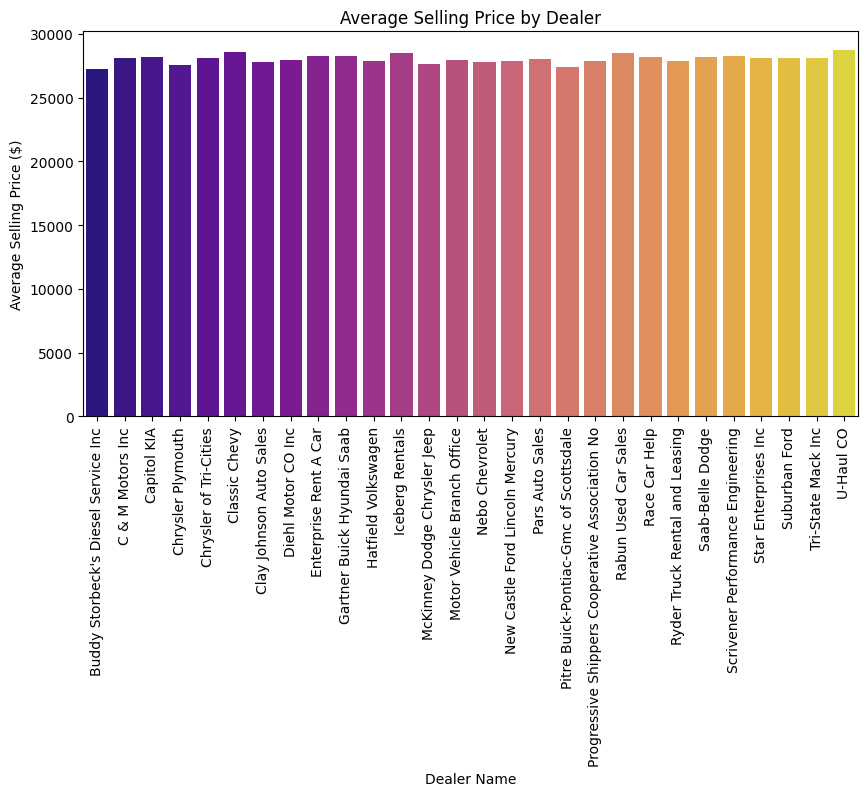

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Dealer_Name', y='Price ($)', data=average_selling_price, palette='plasma')
plt.xticks(rotation=90)
plt.xlabel('Dealer Name')
plt.ylabel('Average Selling Price ($)')
plt.title('Average Selling Price by Dealer')
plt.show()

Brand car nào có biến động giá cao nhất, và điều này cho thấy gì ở mức giá xe thịnh hành ?

In [ ]:
price_variation = df.groupby("Company")["Price ($)"].agg(std_dev = "std", price_range = lambda x: x.max() -x.min()).reset_index()
price_variation

,Company,std_dev,price_range
0,Acura,8183.046414,31501
1,Audi,12904.243867,73500
2,BMW,15065.578723,60500
3,Buick,17142.232626,50801
4,Cadillac,19517.120220,72800
5,Chevrolet,13311.063223,72800
6,Chrysler,11583.286811,39800
7,Dodge,11187.592085,50851
8,Ford,15849.090227,68400
9,Honda,11148.629062,42501


In [ ]:
highest_variation = price_variation.sort_values(by="price_range", ascending=False)
highest_variation

,Company,std_dev,price_range
16,Mercedes-B,15722.807459,83800
15,Lincoln,19658.050211,80800
27,Toyota,15367.131714,73600
1,Audi,12904.243867,73500
4,Cadillac,19517.120220,72800
5,Chevrolet,13311.063223,72800
29,Volvo,12933.790185,70600
8,Ford,15849.090227,68400
19,Nissan,16214.264017,66700
21,Plymouth,19065.997338,66501


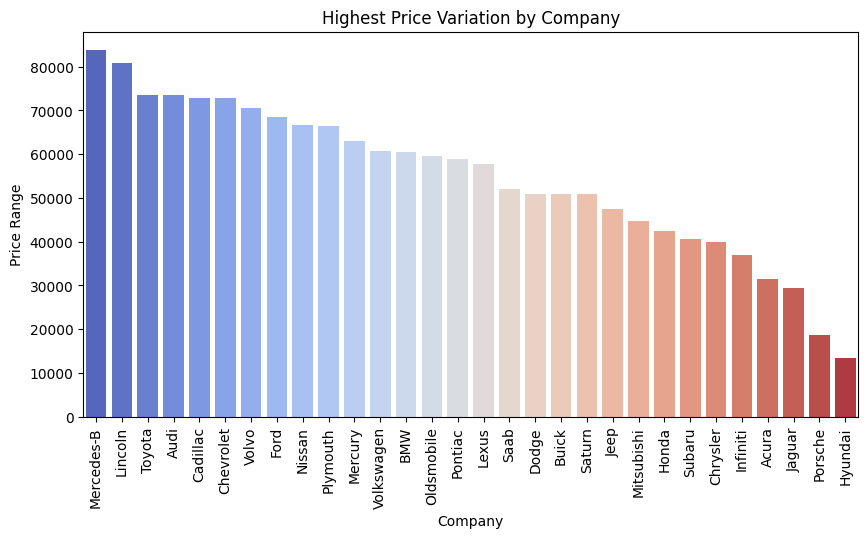

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Company', y='price_range', data=highest_variation, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Price Range')
plt.title('Highest Price Variation by Company')
plt.show()

Phân bổ giá xe cho mỗi loại hộp số

In [ ]:
trans_price = df.groupby('Transmission')['Price ($)'].describe(percentiles=[.25, .5, .75])
trans_price['IQR'] = trans_price['75%'] - trans_price['25%']
trans_price

,count,mean,std,min,25%,50%,75%,max,IQR
Transmission,,,,,,,,,
Auto,12571.0,28248.525972,13747.070597,1200.0,19000.0,24000.0,35500.0,75700.0,16500.0
Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0,17000.0


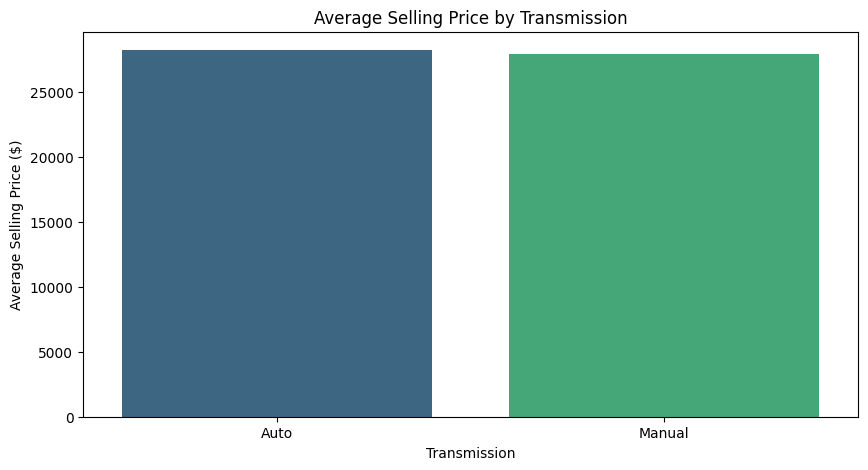

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=trans_price.index, y=trans_price['mean'], palette='viridis')
plt.xlabel('Transmission')
plt.ylabel('Average Selling Price ($)')
plt.title('Average Selling Price by Transmission')
plt.show()

Phân bổ giá xe theo Region

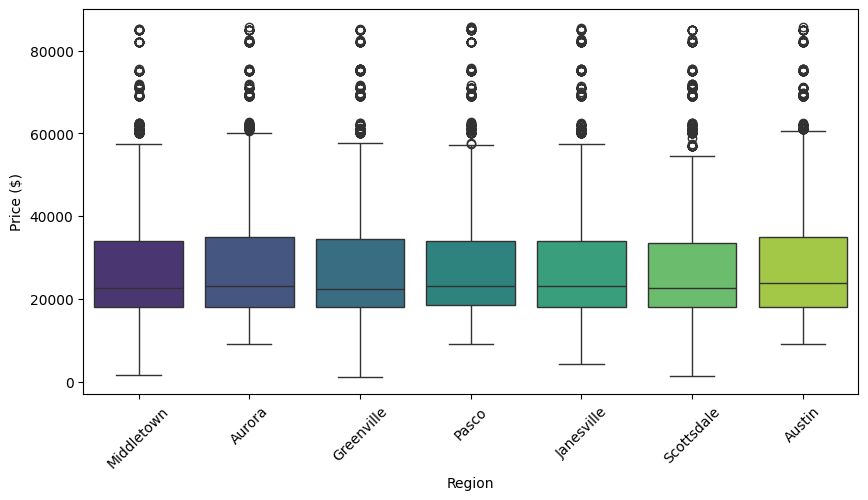

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='viridis')
plt.xticks(rotation=45)
sns.set_style('darkgrid')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.show()

Số lượng bán xe theo từng Region

Text(0, 0.5, 'Count')

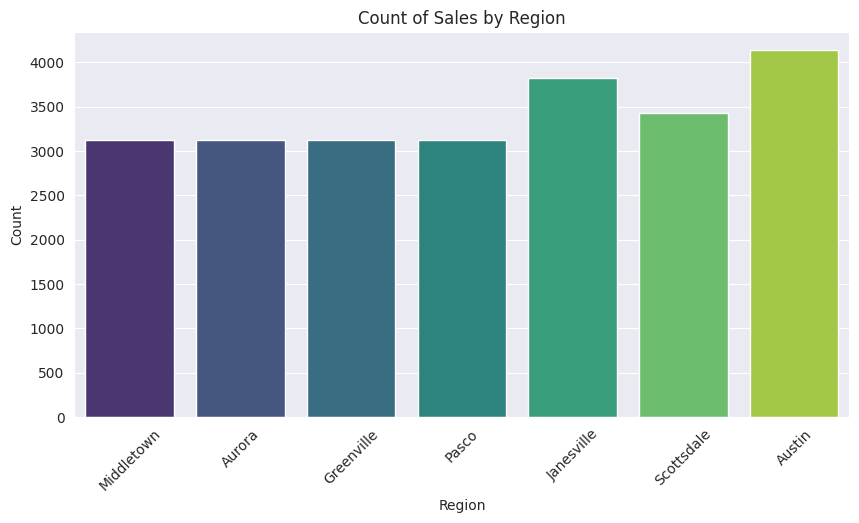

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Dealer_Region', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Count of Sales by Region')
plt.xlabel('Region')
plt.ylabel('Count')

Phân bổ số lượng xe theo body_style

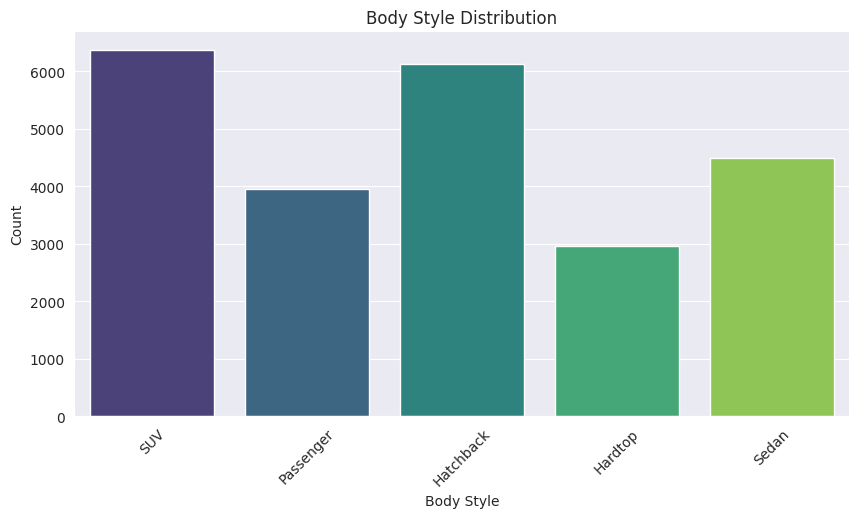

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Body Style', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Body Style Distribution')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()

Mức giá trung bình theo giới tính khách hàng và mức thu nhập hàng năm

In [ ]:
df['Income bin'] = pd.cut(df['Annual Income'], bins=5, labels=['Low', 'Lower-Middle', 'Middle', 'Higher-Middle', 'High'])
avg_price = df.groupby(['Gender', 'Income bin'])['Price ($)'].mean().reset_index()

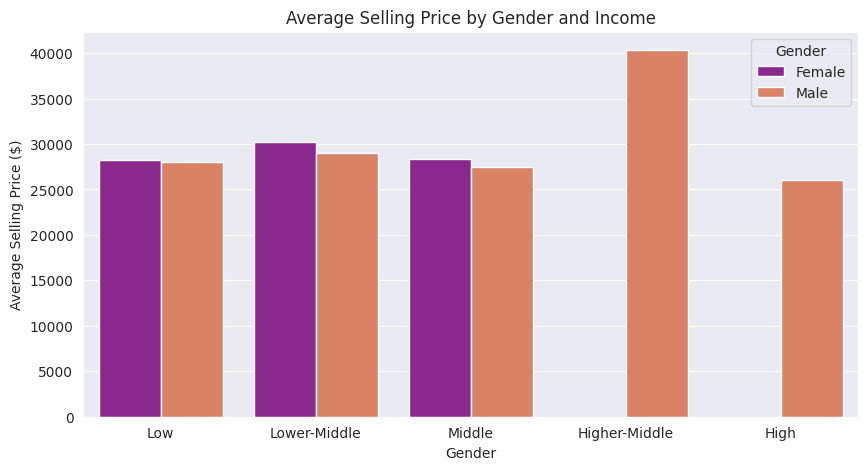

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Income bin', y='Price ($)', hue='Gender', data=avg_price, palette='plasma')
plt.xlabel('Gender')
plt.ylabel('Average Selling Price ($)')
plt.title('Average Selling Price by Gender and Income')
plt.legend(title='Gender')
plt.show()

Giá xe TB theo Engine

In [ ]:
avg_engine_price = df.groupby('Engine')['Price ($)'].mean().reset_index()

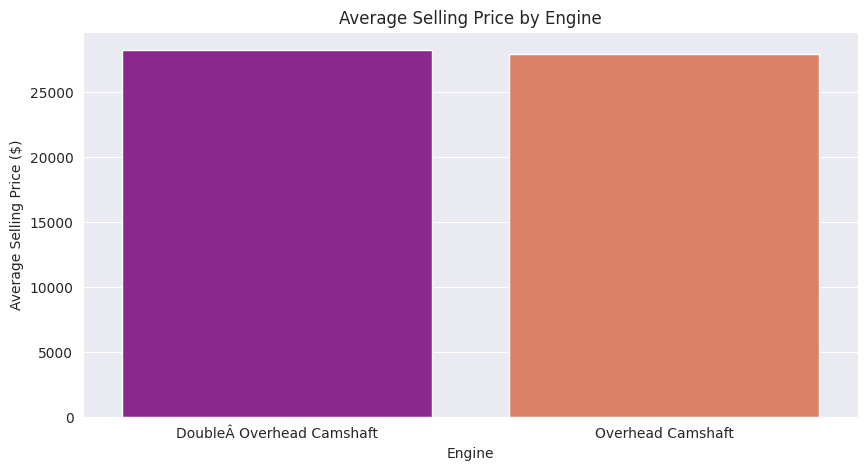

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Engine', y='Price ($)', data=avg_engine_price, palette='plasma')
plt.xlabel('Engine')
plt.ylabel('Average Selling Price ($)')
plt.title('Average Selling Price by Engine')
plt.show()

Tổng số xe bán được theo từng tháng trong năm (2022 và 2023)

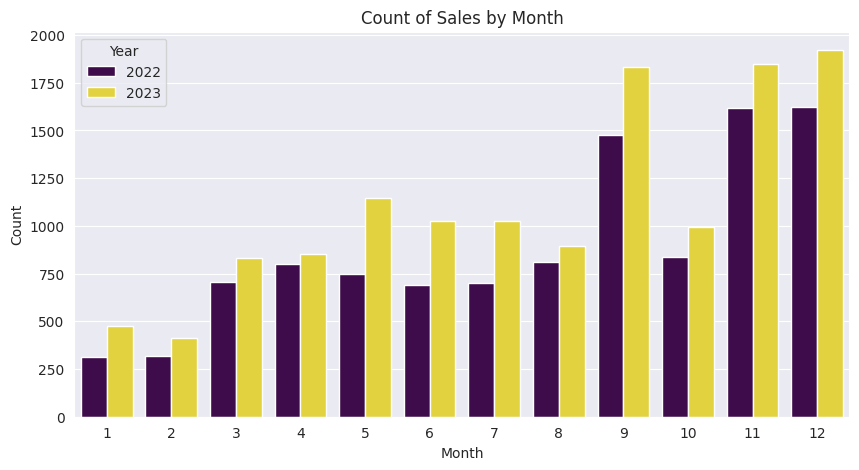

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=df,hue='Year', palette='viridis')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Sales by Month')
plt.show()

Doanh thu bán xe của từng tháng trong năm

In [ ]:
month_revenue = df.groupby(['Year', 'Month'])['Price ($)'].sum().reset_index(name ='Total Sales')

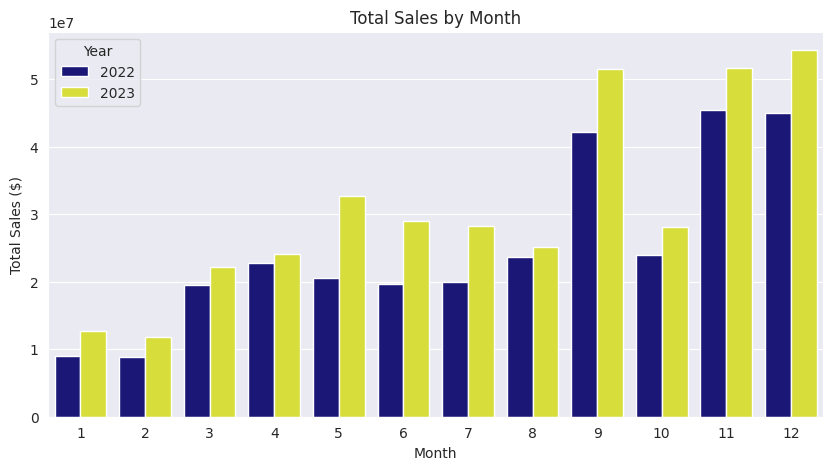

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Month', y='Total Sales', data=month_revenue,hue='Year', palette='plasma')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Month')
plt.show()

Số lượng xe bán được của từng Company

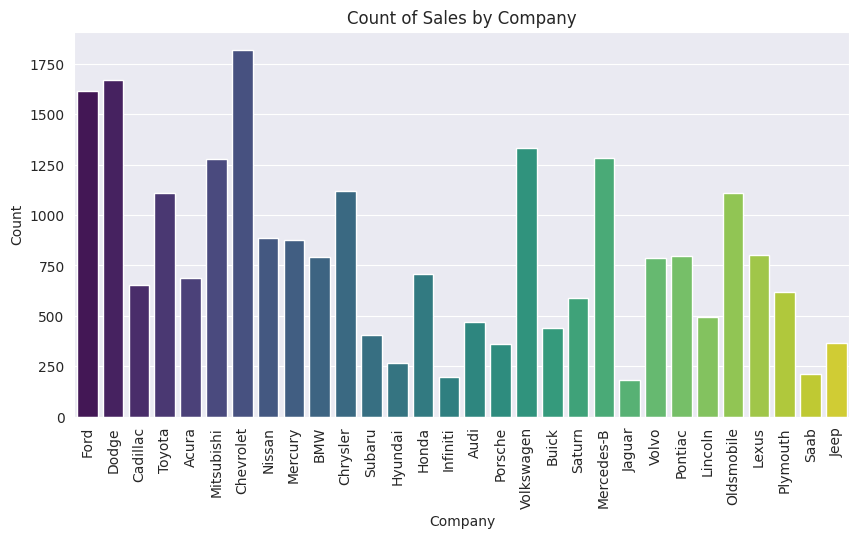

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Company', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Sales by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

# Sử dụng mô hình học máy để dự đoán khách hàng có mua xe hay không

## Tiền xử lý dữ liệu

In [ ]:
# Chọn các cột đặc trưng
selected_columns1 = ['Gender', 'Annual Income', 'Company', 'Model', 'Price ($)', 'Dealer_Region']
df_selected1 = df[selected_columns1]

In [ ]:
# Label Encoder
label_encoders = {}
le = LabelEncoder()
for col in ['Gender', 'Company', 'Model', 'Dealer_Region']:
    df_selected1[col] = le.fit_transform(df_selected1[col])
    label_encoders[col] = le     # Lưu lại bộ mã hóa

In [ ]:
# Tạo biến mục tiêu: 1 nếu thu nhập > 500000 và giá xe > 25000, ngược lại là 0
# df_selected1['Purchase'] = ((df_selected1['Annual Income'] > 500000) & (df_selected1['Price ($)'] > 25000)).astype(int)
df_selected1['Purchase'] = (df_selected1['Annual Income'] > 500000).astype(int)

Check cân bằng nhãn

In [ ]:
df_selected1['Purchase'].value_counts()

,count
Purchase,
1,16423
0,7483


Ta thấy rằng cột nhãn mất cân bằng, 1 quá nhiều, còn 0 thì quá ít, vậy ta sẽ dùng SMOTE để cân bằng dữ liệu

In [ ]:
X = df_selected1.drop(columns=['Purchase', 'Annual Income'])
y = df_selected1['Purchase']

In [ ]:
# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

,count
Purchase,
0,16423
1,16423


In [ ]:
# Chia tập dữ liệu: 80 cho tập train, 20 cho tập test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Khởi tạo mô hình và huấn luyện

Random Forest Model

In [ ]:
# Khởi tạo và huấn luyện
rf = RandomForestClassifier(n_estimators=100 ,random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = rf.predict(X_test)

In [ ]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_report_rf = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Classification Report:\n", classification_report_rf)

Accuracy: 0.64
Precision: 0.66
Recall: 0.59
F1 Score: 0.62
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.70      0.66      3283
           1       0.66      0.59      0.62      3287

    accuracy                           0.64      6570
   macro avg       0.65      0.64      0.64      6570
weighted avg       0.65      0.64      0.64      6570



Tạo lưới đánh giá mô hình

In [ ]:
scoring_metrics = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}

Khởi tạo lưới tham số và tìm tham số tốt nhất

In [ ]:
rf_param_grid = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring=scoring_metrics, refit = 'accuracy')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_classification_rep = classification_report(y_test, y_pred_rf)

In [ ]:
print(f"Best Random Forest Classifier Params: {rf_grid.best_params_}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest Precision: {rf_precision:.2f}")
print(f"Random Forest Recall: {rf_recall:.2f}")
print(f"Random Forest F1_Score: {rf_f1:.2f}")
print("Random Forest Classification Report:")
print(rf_classification_rep)

Best Random Forest Classifier Params: {'max_depth': 20, 'n_estimators': 100}
Random Forest Accuracy: 0.65
Random Forest Precision: 0.66
Random Forest Recall: 0.60
Random Forest F1_Score: 0.63
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      3283
           1       0.66      0.60      0.63      3287

    accuracy                           0.65      6570
   macro avg       0.65      0.65      0.64      6570
weighted avg       0.65      0.65      0.64      6570



Logistic Regression Model

In [ ]:
# Chuẩn hóa dữ liệu bằng StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
 # custom_weights = {0: 3, 1: 1}

In [ ]:
# Khởi tạo và huấn luyện
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = lr.predict(X_test_scaled)

In [ ]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_report_rf = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Classification Report:\n", classification_report_rf)

Accuracy: 0.55
Precision: 0.54
Recall: 0.79
F1 Score: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.32      0.41      3283
           1       0.54      0.79      0.64      3287

    accuracy                           0.55      6570
   macro avg       0.57      0.55      0.53      6570
weighted avg       0.57      0.55      0.53      6570



Khởi tạo lưới tham số và tìm tham số tốt nhất

In [ ]:
lr_param_grid = {"C": [0.01, 0.1, 1, 10, 100], "solver": ["liblinear", "lbfgs"]}
lr_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), lr_param_grid, cv=5, scoring=scoring_metrics, refit = 'f1')
lr_grid.fit(X_train_scaled, y_train)
best_lr = lr_grid.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_classification_rep = classification_report(y_test, y_pred_lr)

In [ ]:
print(f"Best Logistic Regression Params: {lr_grid.best_params_}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print(f"Logistic Regression Precision: {lr_precision:.2f}")
print(f"Logistic Regression Recall: {lr_recall:.2f}")
print(f"Logistic Regression F1_Score: {lr_f1:.2f}")
print("Logistic Regression Classification Report:")
print(lr_classification_rep)

Best Logistic Regression Params: {'C': 0.01, 'solver': 'lbfgs'}
Logistic Regression Accuracy: 0.55
Logistic Regression Precision: 0.54
Logistic Regression Recall: 0.79
Logistic Regression F1_Score: 0.64
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.32      0.41      3283
           1       0.54      0.79      0.64      3287

    accuracy                           0.55      6570
   macro avg       0.57      0.55      0.53      6570
weighted avg       0.57      0.55      0.53      6570



SVC Model

In [ ]:
svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
y_pred = svc.predict(X_test_scaled)

In [ ]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_report_rf = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Classification Report:\n", classification_report_rf)

Accuracy: 0.56
Precision: 0.54
Recall: 0.76
F1 Score: 0.63
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.36      0.45      3283
           1       0.54      0.76      0.63      3287

    accuracy                           0.56      6570
   macro avg       0.57      0.56      0.54      6570
weighted avg       0.57      0.56      0.54      6570



Khởi tạo lưới tham số và tìm tham số tốt nhất

In [ ]:
svm_param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
svm_grid = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5, scoring=scoring_metrics, refit = 'f1')
svm_grid.fit(X_train_scaled, y_train)
best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_classification_rep = classification_report(y_test, y_pred_svm)

In [ ]:
print(f"\nBest SVM Params: {svm_grid.best_params_}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"SVM Precision: {svm_precision:.2f}")
print(f"SVM Recall: {svm_recall:.2f}")
print(f"SVM F1_Score: {svm_f1:.2f}")
print("SVM Classification Report:")
print(svm_classification_rep)


Best SVM Params: {'C': 0.1, 'kernel': 'linear'}
SVM Accuracy: 0.55
SVM Precision: 0.54
SVM Recall: 0.80
SVM F1_Score: 0.64
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.30      0.40      3283
           1       0.54      0.80      0.64      3287

    accuracy                           0.55      6570
   macro avg       0.57      0.55      0.52      6570
weighted avg       0.57      0.55      0.52      6570

